## Contents

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Data Preparation and Cleaning

1. Look at the files using Pandas
2. Look at some information about the file on rows and columns
3. Fix incorrect or missing values


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
datafile_name= '/Users/sakshumsingh/Workspace/Case-Studies/Covid Data.csv'
df= pd.read_csv(datafile_name)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [153]:
df= df.drop('MEDICAL_UNIT',axis=1)
df

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


usmer > check up > patient type(hospitalised or sent back) > ICU yes/no > ventilator > returned

In [186]:
df.head(50)

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,2,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   SEX                   1048575 non-null  int64 
 2   PATIENT_TYPE          1048575 non-null  int64 
 3   DATE_DIED             1048575 non-null  object
 4   INTUBED               1048575 non-null  int64 
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HIPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

In [156]:
df.describe().round(2)

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.00,1048575.0,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,1.63,1.5,1.19,79.52,3.35,41.79,49.77,2.19,2.26,2.24,2.30,2.13,2.44,2.26,2.13,2.26,2.21,5.31,79.55
std,0.48,0.5,0.39,36.87,11.91,16.91,47.51,5.42,5.13,5.11,5.46,5.24,6.65,5.19,5.18,5.14,5.32,1.88,36.82
min,1.00,1.0,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,1.0,1.00,97.00,2.00,30.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,97.00
50%,2.00,1.0,1.00,97.00,2.00,40.00,97.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,97.00
75%,2.00,2.0,1.00,97.00,2.00,53.00,97.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,97.00
max,2.00,2.0,2.00,99.00,99.00,121.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,7.00,99.00


In [271]:
# Percentage of females affected

females= df[df['SEX']== 1]
round(((len(females.index) / len(df.index)) * 100),2)


50.07

In [272]:
#Percentage of males affected

males= df[df['SEX']== 2]
round(((len(males.index)/ len(df.index)) * 100),2)


49.93

In [268]:
# Percentage of people who were returned home?
# 848544

returned_home = df[df['PATIENT_TYPE']== 1] 
round(((len(returned_home.index)/len(df.index)) * 100),2)

80.92

In [269]:
##Percentage of people who were hospitalised?

hospitalised = df[df['PATIENT_TYPE']== 2] 
round(((len(hospitalised.index)/len(df.index)) * 100),2)

19.08

In [273]:
# Percentage of people who were hospitalised and were not admitted in the ICU and vice verssa?

not_icu= hospitalised[(hospitalised['ICU'] == 2) | (hospitalised['ICU'] == 99)]
round(((len(not_icu.index)/ len(hospitalised.index)) * 100),2)


91.57

(array([1269.,  362.,  904., 1703., 2978., 4110., 3128., 1868.,  482.,
          54.]),
 array([  0. ,  10.4,  20.8,  31.2,  41.6,  52. ,  62.4,  72.8,  83.2,
         93.6, 104. ]),
 <BarContainer object of 10 artists>)

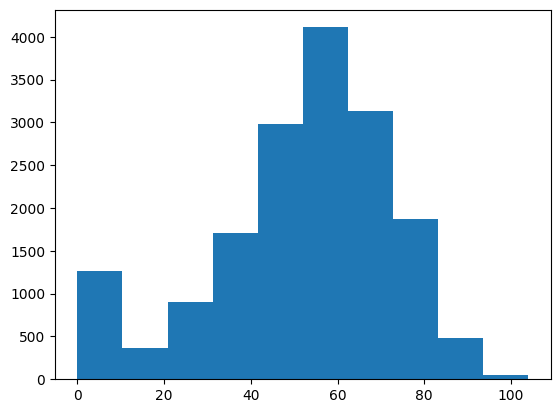

In [280]:
# what ages of people were admitted in the ICU.

admitted_icu= hospitalised[(hospitalised['ICU'] == 1)]

round (((len(admitted_icu.index)/ len(hospitalised.index)) * 100),2)

# Plot a histogram of the ages of peole in the ICU

plt.hist(admitted_icu['AGE'], bins= 10)
plt.xlabel('Distribution of Ages')


In [263]:
def age_segment(num):
    if num > 0 and num <=2:
        return "Infant"
    elif num > 2 and num <= 17:
        return "Child"
    elif num > 17 and num <= 65:
        return "Adult"
    else:
        return "Elderly"

admitted_icu['age_segment'] = admitted_icu['AGE'].apply(age_segment)
admitted_icu

/var/folders/v9/rgx0l6cn07j5nt4bm2d4z6500000gn/T/ipykernel_48525/3778080973.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admitted_icu['age_segment'] = admitted_icu['AGE'].apply(age_segment)


,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Age_Segment,age_segment
16,2,1,2,9999-99-99,2,1,80,2,2,2,...,1,2,2,2,2,2,3,1,Elderly,Elderly
20,2,2,2,9999-99-99,2,1,59,97,1,2,...,2,2,2,2,2,1,3,1,Adult,Adult
41,2,2,2,9999-99-99,1,1,45,97,2,2,...,2,2,2,2,2,2,3,1,Adult,Adult
56,2,1,2,9999-99-99,1,1,58,2,2,2,...,1,2,1,1,2,2,7,1,Adult,Adult
57,2,1,2,9999-99-99,1,1,48,2,1,2,...,2,2,2,2,2,2,7,1,Adult,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,2,2,9999-99-99,1,1,1,97,2,2,...,2,2,2,2,2,2,7,1,Infant,Infant
1048270,2,1,2,9999-99-99,1,1,22,2,2,2,...,2,2,2,2,2,2,7,1,Adult,Adult
1048358,1,1,2,9999-99-99,1,2,44,2,2,2,...,2,2,2,2,2,2,7,1,Adult,Adult
1048364,1,2,2,9999-99-99,1,1,55,97,2,2,...,1,2,2,1,2,1,7,1,Adult,Adult


In [265]:
age_segment_count= admitted_icu['age_segment'].value_counts()
age_segment_df = pd.DataFrame(data=age_segment_count)
age_segment_df

,age_segment
Adult,10852
Elderly,5307
Child,460
Infant,239


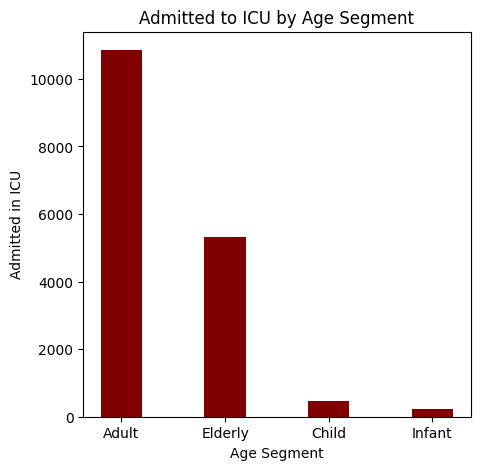

In [241]:
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(age_segment_df.index, age_segment_df['Age_Segment'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Age Segment")
plt.ylabel("Admitted in ICU")
plt.title("Admitted to ICU by Age Segment")
plt.show()